Import libraries

In [0]:
import numpy as np
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Noise = 0.1

Import Noisy Images

In [0]:
bad_frames = '/content/drive/My Drive/natural-images/natural_images/noisy_flower/0.1'

In [3]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

In [4]:
print(noisy_frames.shape)

(843, 224, 224, 3)


Import Clean Images

In [0]:
good_frames = '/content/drive/My Drive/natural-images/natural_images/flower'

In [6]:
clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)

clean_frames = np.array(clean_frames)

In [7]:
print(clean_frames.shape)

(843, 224, 224, 3)


Split Images Into Training & Test

In [8]:
round(len(noisy_frames)*0.8)

674

In [0]:
#80% of images to training set
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

Autoencoder

In [0]:
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', input_shape = (224, 224, 3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Conv2D(filters = 4, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 4, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 224, 224, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 8)       1160      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 8)       32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 4)       292       
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 4)       16        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 224, 224, 4)       0

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
history = autoencoder.fit(noisy_train, clean_train, epochs=100, validation_data=(noisy_test, clean_test))

Epoch 1/100
22/22 [==============================] - 2s 105ms/step - loss: 0.6064 - val_loss: 0.7027
Epoch 2/100
22/22 [==============================] - 2s 87ms/step - loss: 0.5323 - val_loss: 0.6623
Epoch 3/100
22/22 [==============================] - 2s 87ms/step - loss: 0.5264 - val_loss: 0.6385
Epoch 4/100
22/22 [==============================] - 2s 87ms/step - loss: 0.5225 - val_loss: 0.6197
Epoch 5/100
22/22 [==============================] - 2s 87ms/step - loss: 0.5190 - val_loss: 0.6100
Epoch 6/100
22/22 [==============================] - 2s 87ms/step - loss: 0.5146 - val_loss: 0.5943
Epoch 7/100
22/22 [==============================] - 2s 87ms/step - loss: 0.5145 - val_loss: 0.5824
Epoch 8/100
22/22 [==============================] - 2s 87ms/step - loss: 0.5126 - val_loss: 0.5757
Epoch 9/100
22/22 [==============================] - 2s 88ms/step - loss: 0.5096 - val_loss: 0.5645
Epoch 10/100
22/22 [==============================] - 2s 87ms/step - loss: 0.5086 - val_loss: 0.562

Model History

Test Autoencoder

In [0]:
results = autoencoder.predict(noisy_test)

In [0]:
image = np.random.randint(0, len(noisy_test))

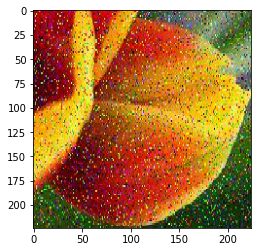

In [16]:
plt.imshow(noisy_test[image])
plt.show()

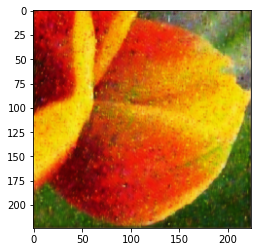

In [17]:
plt.imshow(results[image])
plt.show()

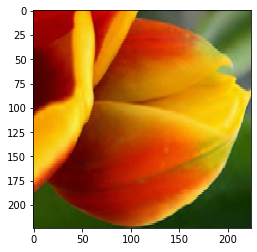

In [18]:
plt.imshow(clean_test[image])
plt.show()